In [1]:
# Importing all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Evvaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
crime_count_df = pd.read_csv('../Data/crimeCountByDay.csv')

In [3]:
crime_count_df = crime_count_df.rename(columns={'Name':'Date', ' Title':'Crime_Count'})

In [4]:
Day_of_Year = []
for i in range(len(crime_count_df)):
    date = datetime.strptime(crime_count_df['Date'][i], '%Y-%m-%d')
    day_of_year = int(date.strftime('%j'))
    Day_of_Year.append(day_of_year)
    
crime_count_df['Day_of_Year'] = Day_of_Year

In [5]:
crime_count_df.tail()

,Date,Crime_Count,Day_of_Year
156,2020-06-05,69,157
157,2020-06-06,89,158
158,2020-06-07,71,159
159,2020-06-08,78,160
160,2020-06-09,75,161


In [6]:
crime_count_df = crime_count_df.loc[(crime_count_df['Date'] != '2020-05-31') &
                                    (crime_count_df['Date'] != '2020-06-01')]

In [7]:
# Splitting data into X and y
X = crime_count_df.Day_of_Year.values.reshape(-1,1)
y = crime_count_df.Crime_Count.values.reshape(-1,1)

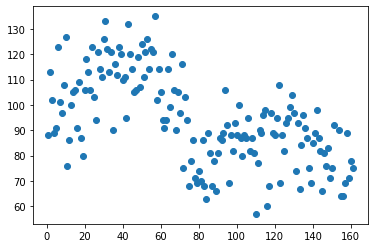

In [8]:
plt.scatter(X, y)

In [9]:
# Split data in train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print(X.shape, y.shape)

(159, 1) (159, 1)


In [11]:
# Fitting our model with all of our features in X
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 276.9756265835242
R-squared (R2 ): 0.20265205836942435


In [13]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.23330521]]
y-axis intercept:  [111.94499243]


Text(0.5, 1.0, 'Residual Plot')

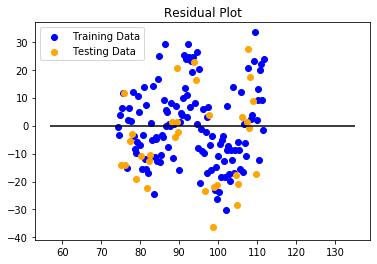

In [14]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [22]:
predict_value = model.predict(np.array(pd.DataFrame([157])))

In [23]:
predict_value

array([[75.31607495]])

In [24]:
model.score(X_test, y_test)

0.20265205836942438

In [25]:
import joblib
filename = 'crimeCountPredictionModel.h5'
joblib.dump(model, filename)

['crimeCountPredictionModel.h5']

In [26]:
crimeCountModel = joblib.load('crimeCountPredictionModel.h5')

In [27]:
predict_value_again = crimeCountModel.predict(np.array(pd.DataFrame([164])))

In [28]:
predict_value_again

array([[73.6829385]])